<a href="https://colab.research.google.com/github/ReynadelYolo/ML_Projects/blob/main/DecisionTreeClassifier_IntroAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
file_name = "/content/drive/MyDrive/MASTER BSBI/Intro/churn.csv"

In [67]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df = pd.read_csv(file_name)

In [70]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [72]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [73]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [74]:
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [75]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [76]:
numcols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

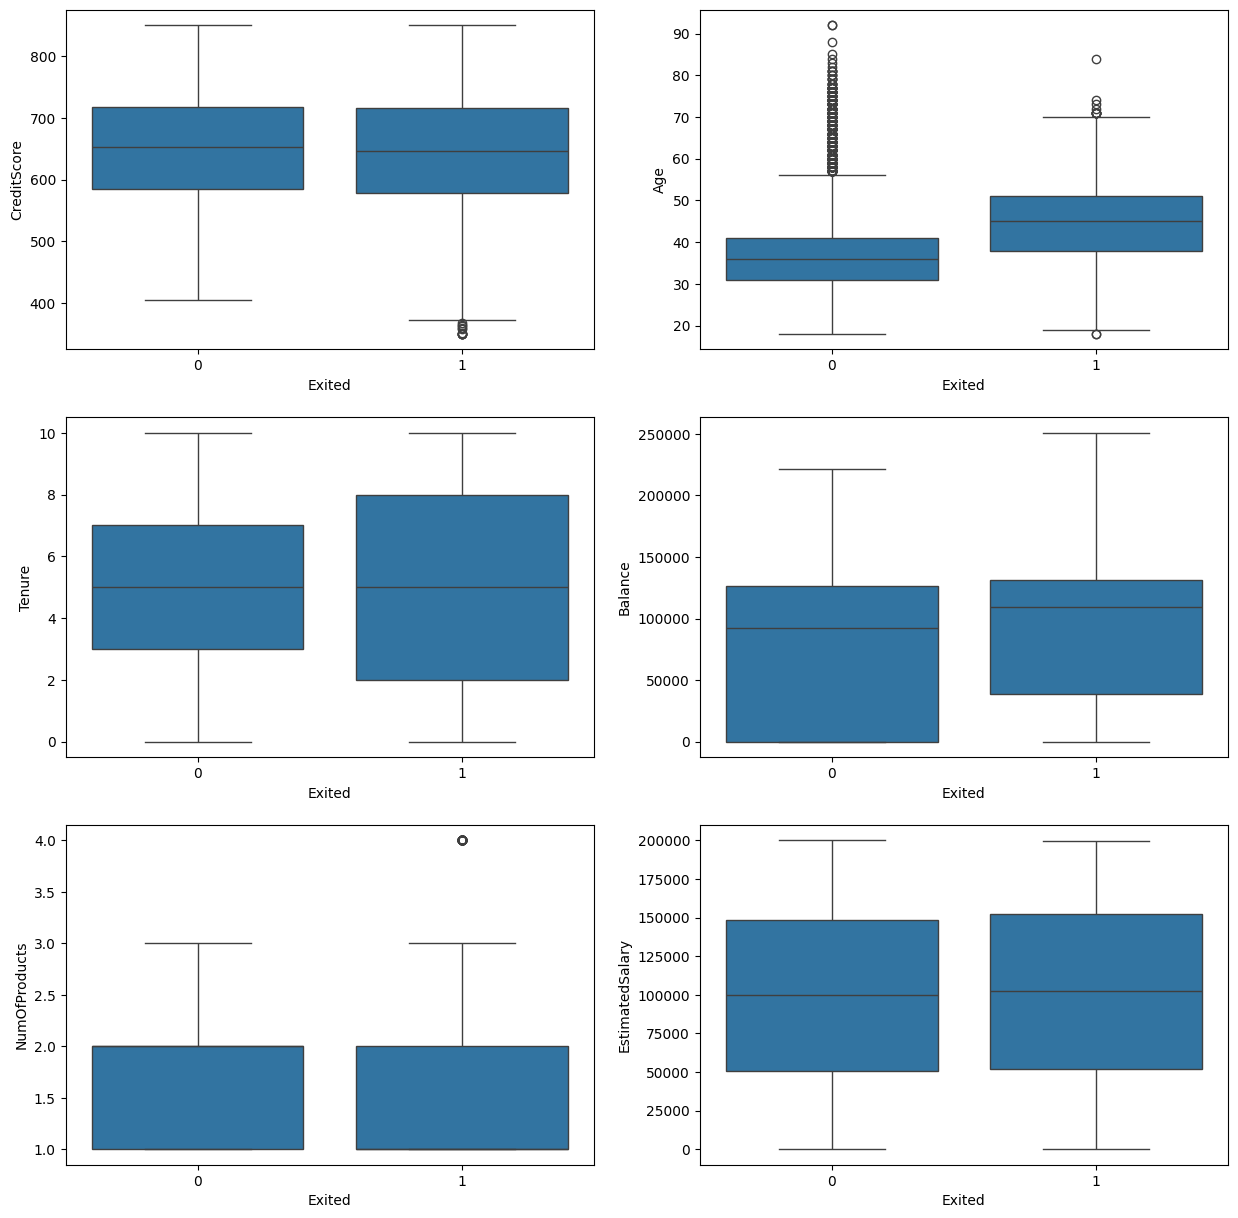

In [77]:
fig, ax = plt.subplots(3,2, figsize=(15,15))
for i, subplot in zip(numcols, ax.flatten()):
  sns.boxplot(x="Exited", y=i, data=df, ax=subplot)
plt.show()

In [78]:
for i in numcols:
  q75 = df[i].quantile(0.75)
  q25 = df[i].quantile(0.25)
  iqr = q75 - q25
  min = q25 - (iqr*1.5)
  max = q75 + (iqr*1.5)
  df = df[df[i] > min]
  df = df[df[i] < max]

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Geography"] = df["Geography"] = le.fit_transform(df["Geography"])
df["Gender"] = df["Gender"] = LabelEncoder().fit_transform(df["Gender"])
le.classes_

array(['France', 'Germany', 'Spain'], dtype=object)

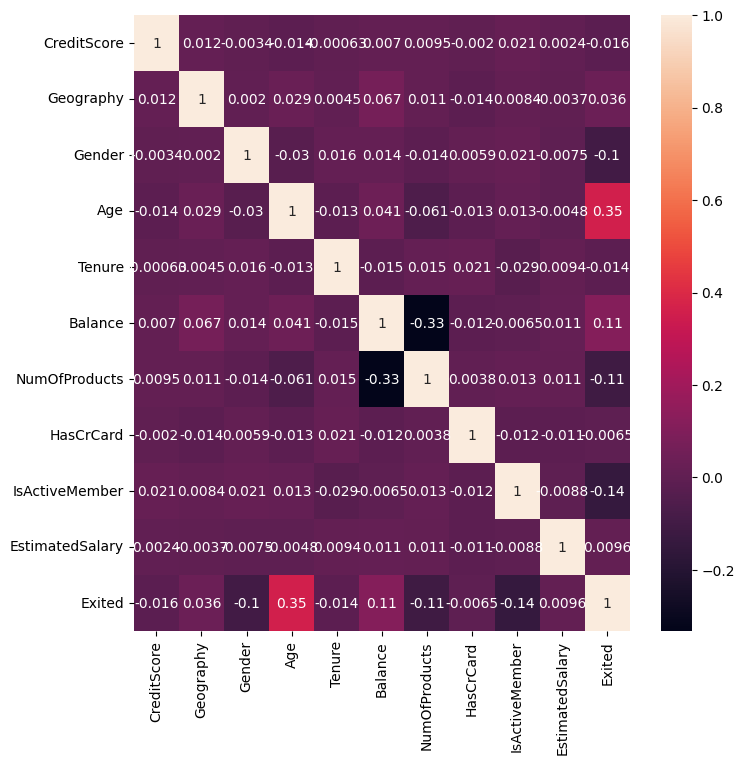

In [85]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [87]:
dtree = DecisionTreeClassifier()

In [88]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [89]:
x = df.drop("Exited", axis=1)
y = df["Exited"]

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [91]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [92]:
dtree_predict = dtree.predict(x_test)

In [95]:
dtree_predict.mean()

np.float64(0.2042031523642732)

In [96]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [97]:
print(classification_report(y_test, dtree_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2274
           1       0.46      0.46      0.46       581

    accuracy                           0.78      2855
   macro avg       0.66      0.66      0.66      2855
weighted avg       0.78      0.78      0.78      2855

